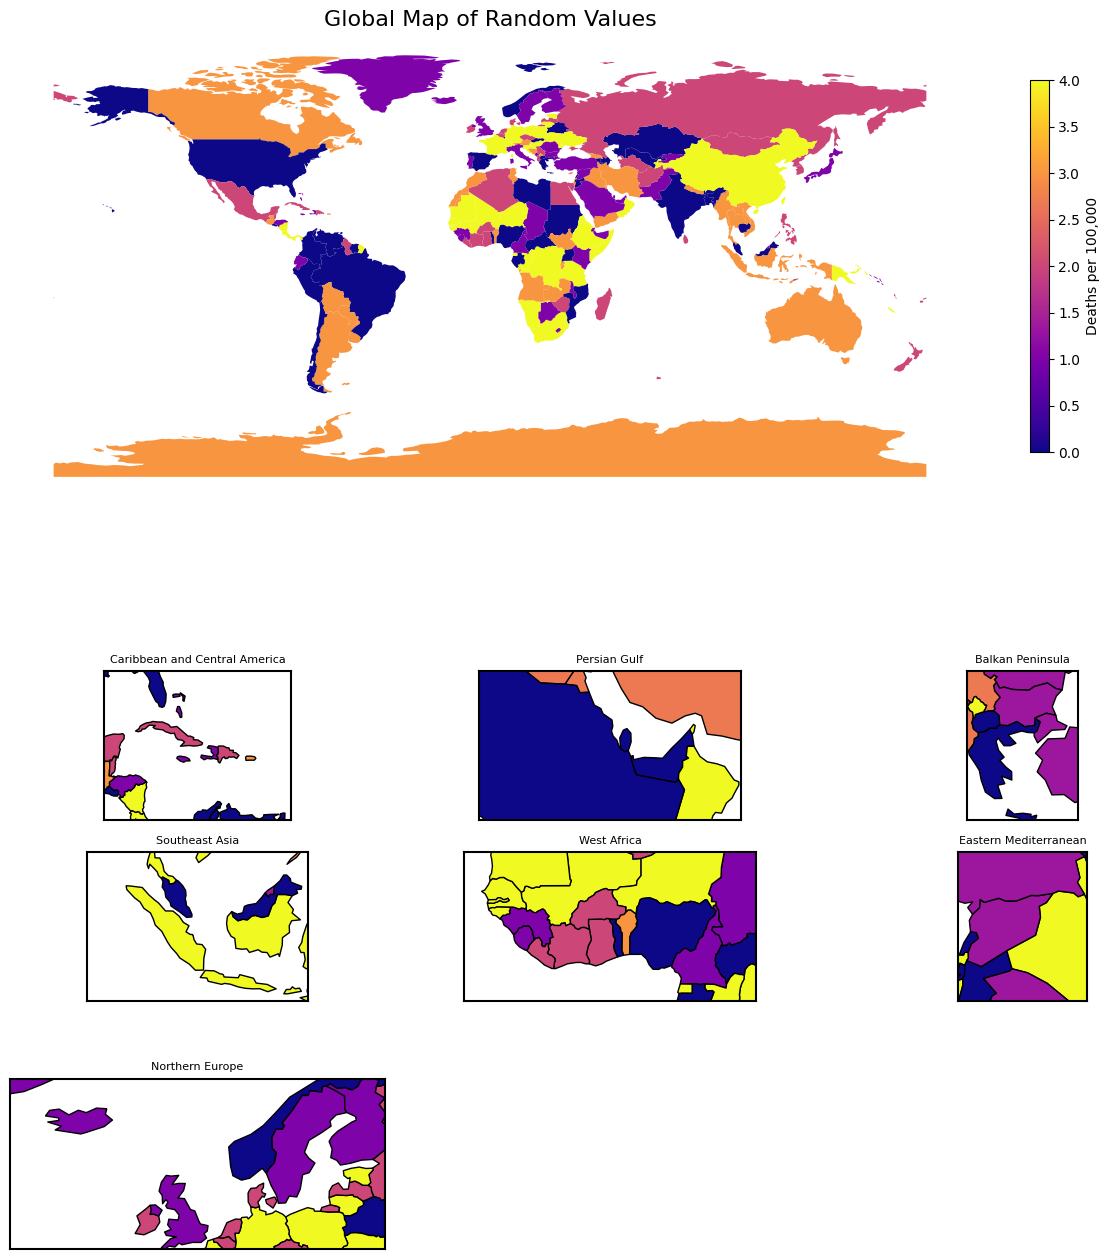

In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Load world shapefile
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Assign random values to each country (as placeholder data)
np.random.seed(42)
world['random_value'] = np.random.rand(len(world))

# Define quantiles and classify data
quantiles = world['random_value'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
world['quantile'] = np.digitize(world['random_value'], bins=quantiles, right=True)

# Define the areas of interest (minx, miny, maxx, maxy, title)
areas_of_interest = [
    (-90, 10, -60, 30, "Caribbean and Central America"),
    (40, 20, 60, 30, "Persian Gulf"),
    (20, 35, 30, 45, "Balkan Peninsula"),
    (90, -10, 120, 10, "Southeast Asia"),
    (-20, 0, 20, 20, "West Africa"),
    (35, 30, 45, 40, "Eastern Mediterranean"),
    (-30, 50, 30, 70, "Northern Europe")
]

# Prepare the layout
fig = plt.figure(figsize=(20, 20))  # Adjusted height for 2 rows
gs = GridSpec(4, 3, figure=fig, height_ratios=[2, 0.4, 0.4, 0.7], wspace=0.1, hspace=0.1)

# Plot the main world map
ax_main = fig.add_subplot(gs[0, :])
world.plot(column='quantile', cmap='plasma', legend=True, ax=ax_main,
           legend_kwds={'label': "Deaths per 100,000", 'shrink': 0.5})
ax_main.set_title("Global Map of Random Values", fontsize=16)
ax_main.axis('off')

# Add zoomed-in maps for areas of interest
positions = [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0)]
for (minx, miny, maxx, maxy, title), (row, col) in zip(areas_of_interest, positions):
    ax_zoom = fig.add_subplot(gs[row, col])
    zoomed_area = world.cx[minx:maxx, miny:maxy]
    zoomed_area.plot(column='quantile', cmap='plasma', ax=ax_zoom, legend=False, edgecolor='black')
    ax_zoom.set_xlim(minx, maxx)
    ax_zoom.set_ylim(miny, maxy)
    ax_zoom.set_title(title, fontsize=8)
    ax_zoom.axis('on')  # Enable axis display

    # Remove ticks and tick labels
    ax_zoom.set_xticks([])
    ax_zoom.set_yticks([])
    ax_zoom.set_xticklabels([])
    ax_zoom.set_yticklabels([])

    # Add a black border around each subplot
    for spine in ax_zoom.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

# Adjust layout
fig.subplots_adjust(left=0.15, right=0.75, top=0.75, bottom=0.05)
plt.show()